sets definitions for various functions

In [1]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / n if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for x in list_obj:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

creates function to gather stats of functions listed above

In [2]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)  
    return stats_df

imports daily stock data on the stocks listed in code

In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

creates a table for stock data gathered

In [4]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)
close_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765715,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
...,...,...,...,...
2020-09-18,200.389999,106.839996,252.529999,442.149994
2020-09-21,202.539993,110.080002,248.149994,449.390015
2020-09-22,207.419998,111.809998,254.750000,424.230011


creates a graph for "closed data

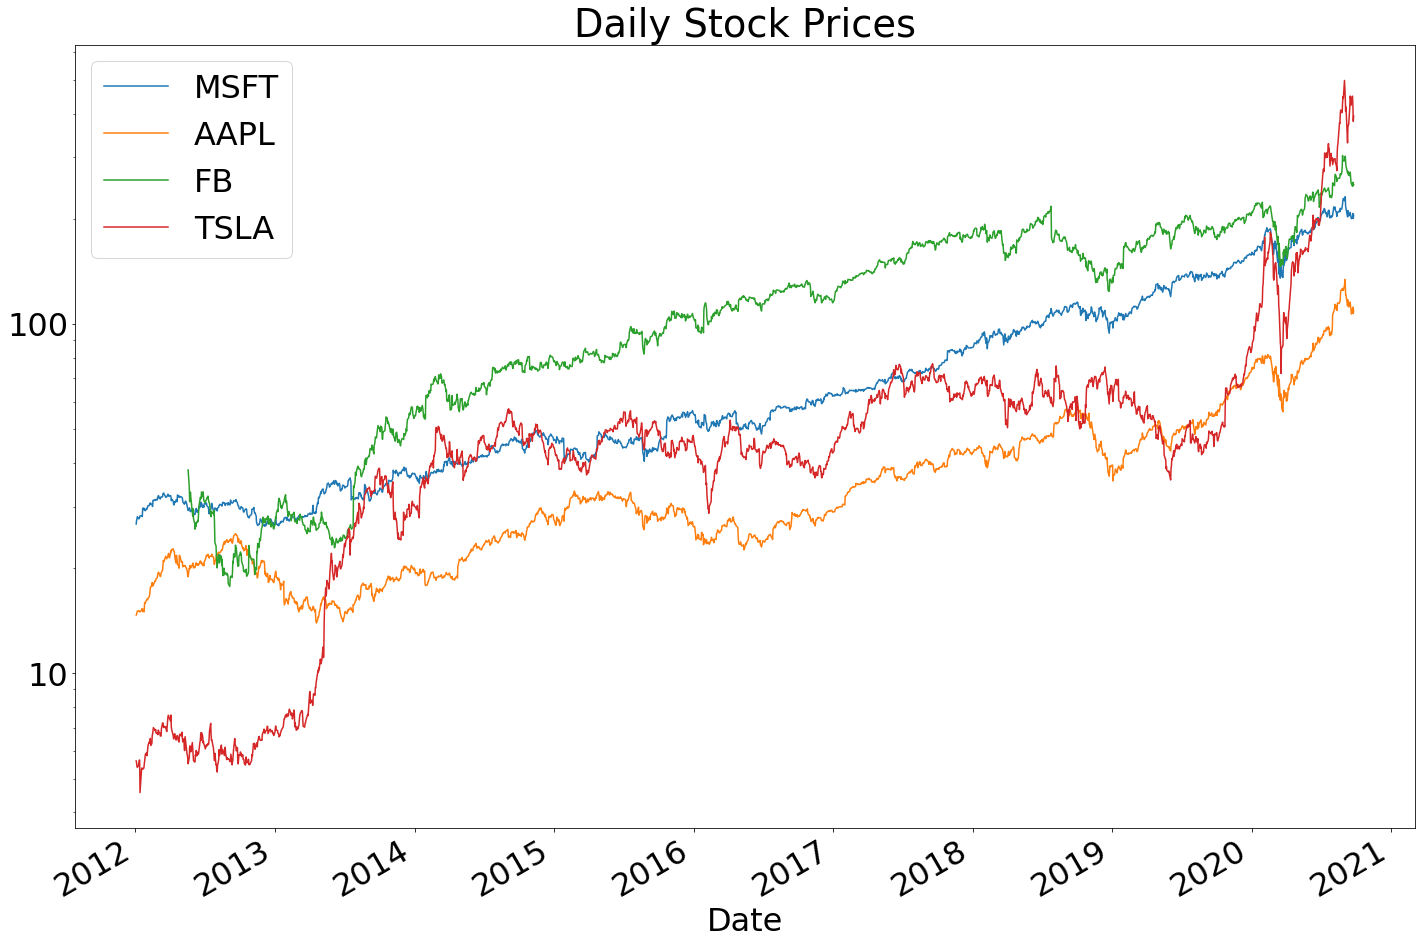

In [5]:
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# set y axis as logged to view changes in proportional terms
# instead of absolute terms
ax.set_yscale("log")
# reset y labels to integer from scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

changes data from "close_data" to %

In [6]:
price_change_data = close_data.pct_change() * 100

creates a chart that shows daily % change for selected stocks

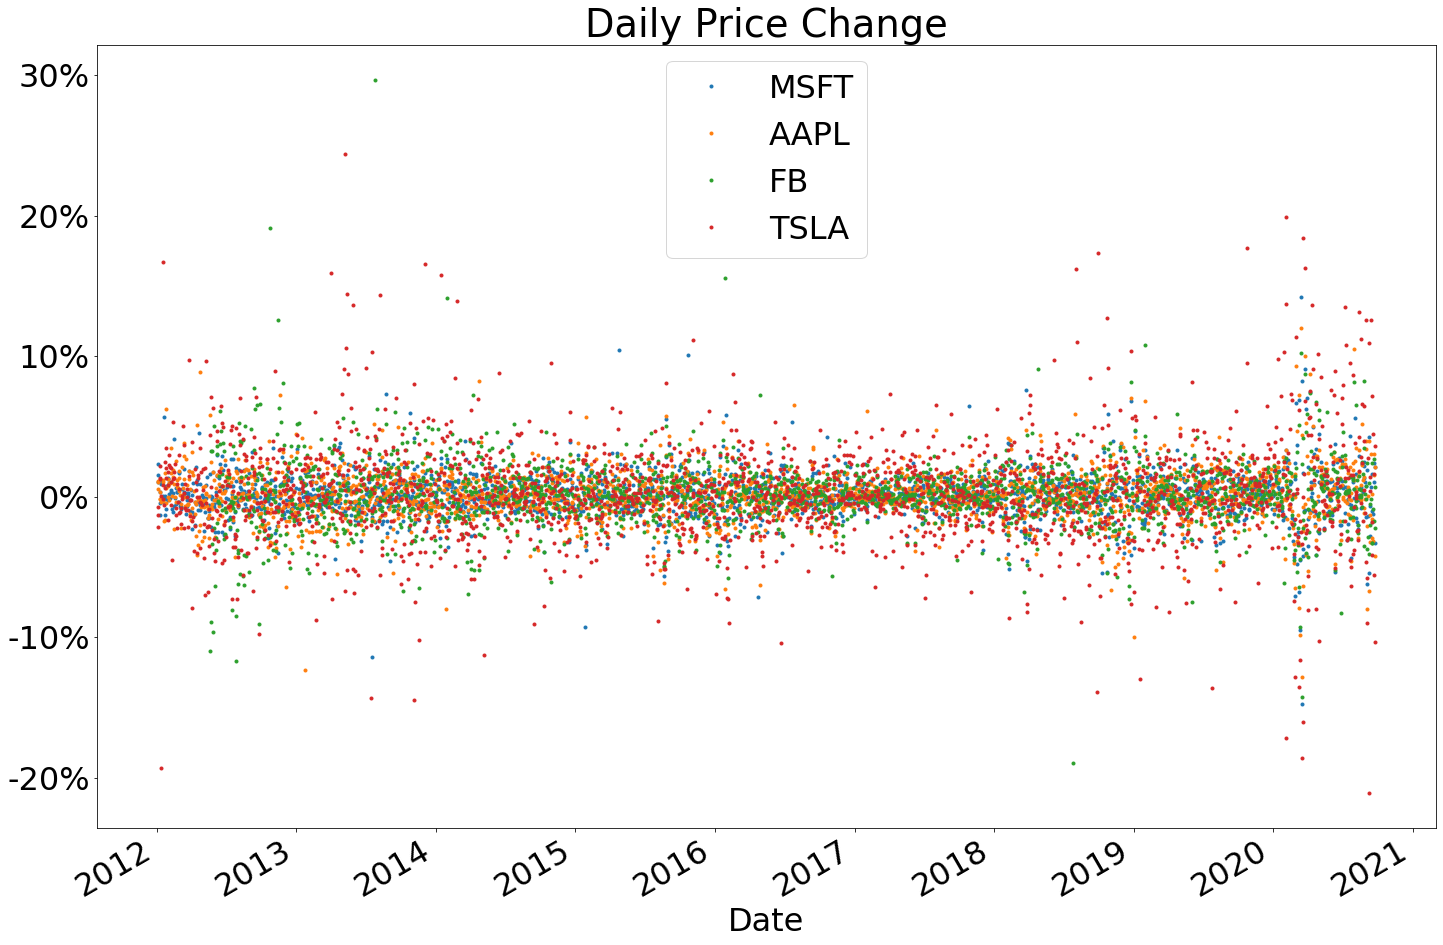

In [7]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

creates a table with all results from stats functions for the selected stocks

In [8]:
stats_df = gather_statistics(price_change_data)
stats_df

,MSFT,AAPL,FB,TSLA
mean,0.106,0.108,0.117,0.255
median,0.069,0.087,0.107,0.122
variance,2.674,3.230,5.559,12.338
S.D.,1.635,1.797,2.358,3.513
skewness,0.004,0.004,0.000,0.017
kurtosis,14.215,10.030,22.313,9.496


creates a histogram (bar chart) using pandas and matplotlib for apple stock

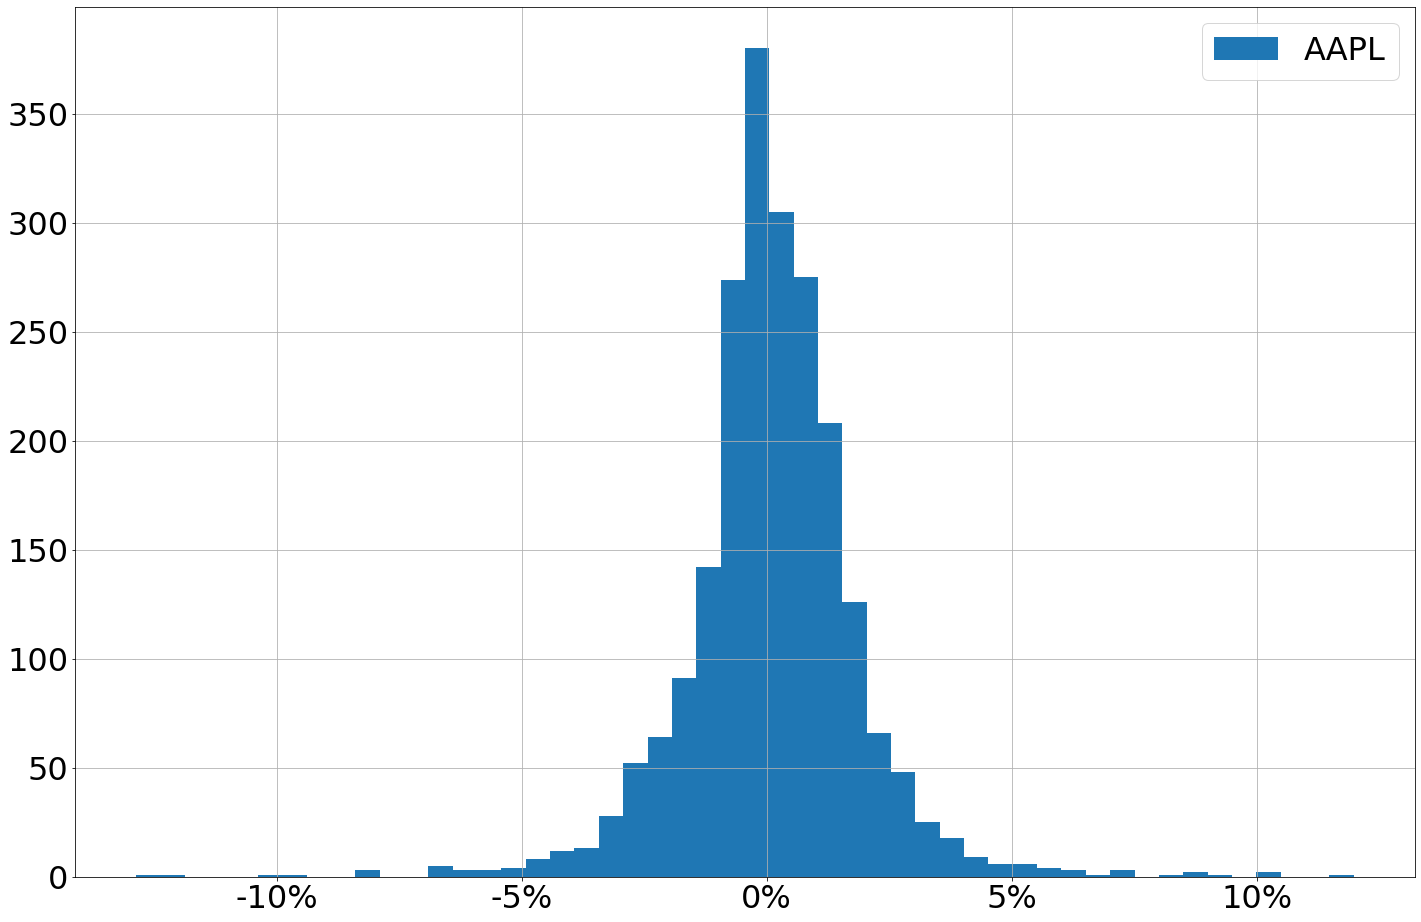

In [9]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

turns the histogram into a distribution of percentages using density = "true"

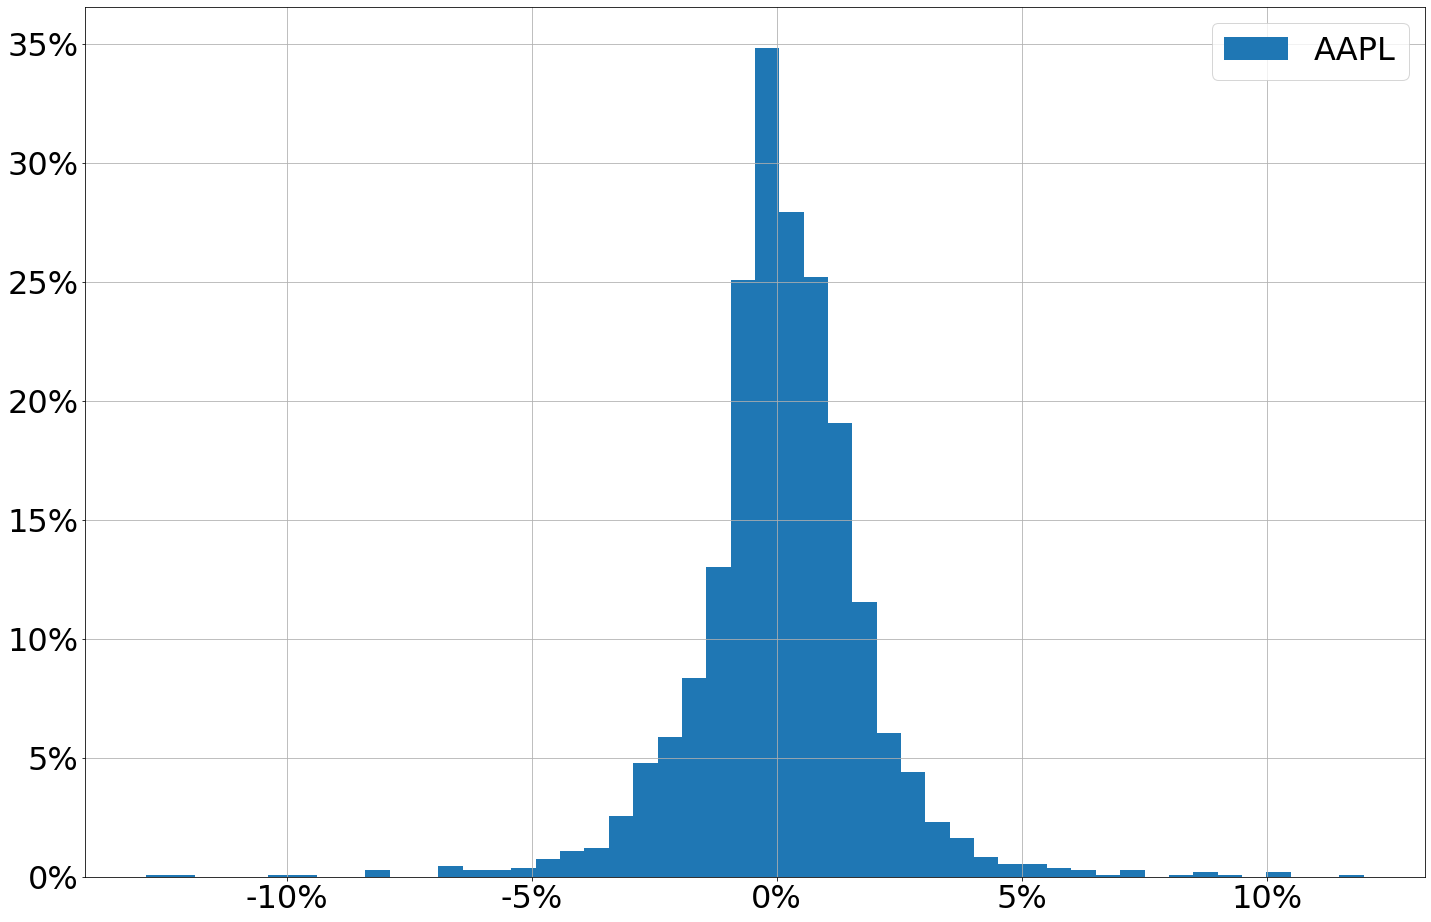

In [10]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL", density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.legend()

shows all distrabutions so we can compare them

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f867615bf70>,
      dtype=object)

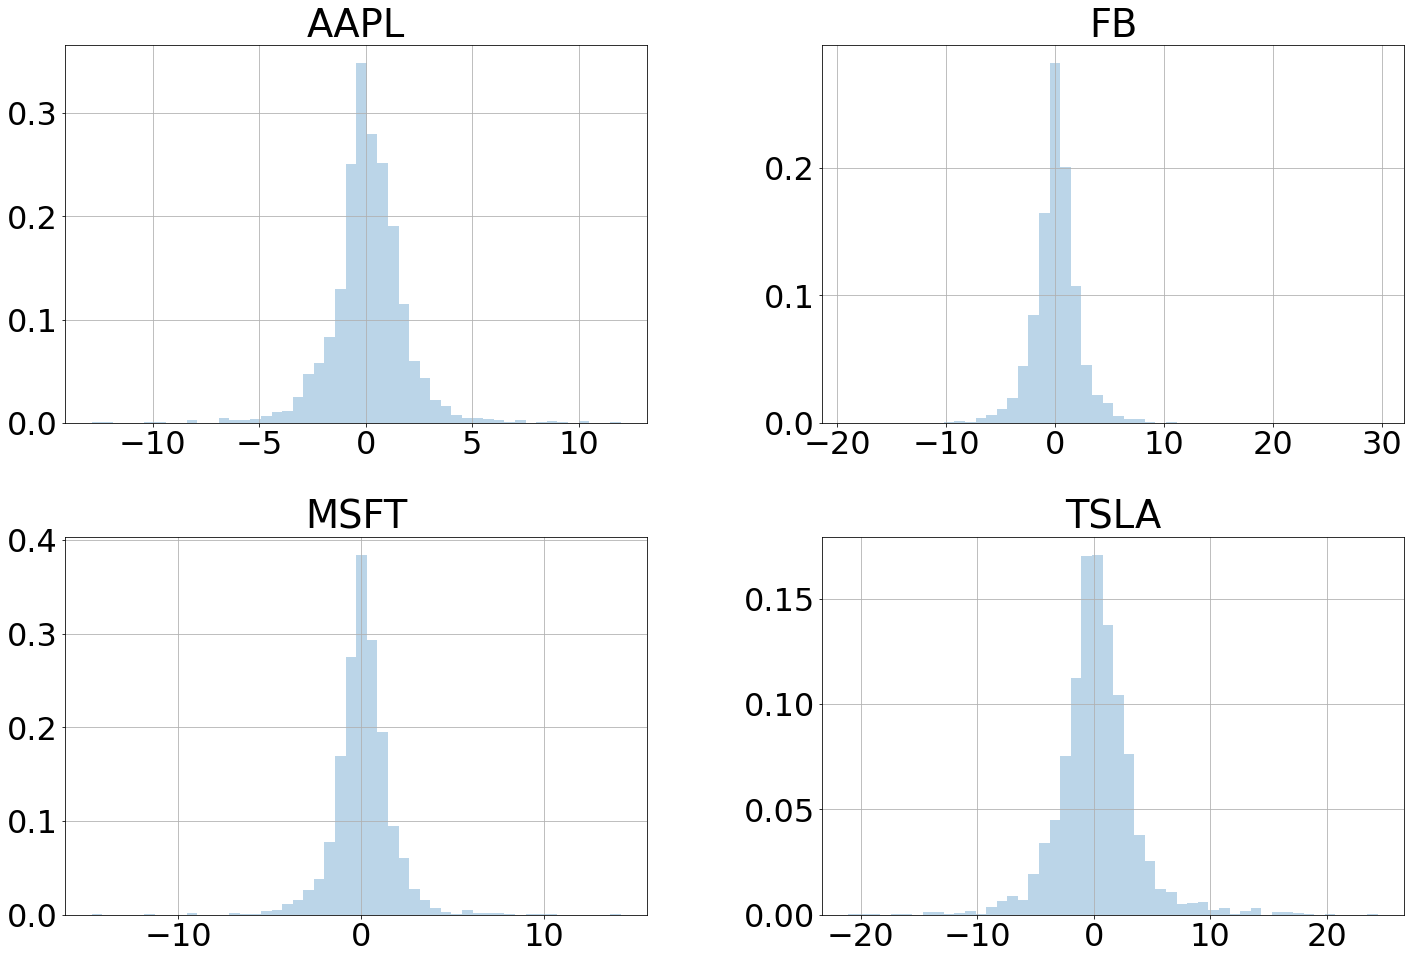

In [11]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

adds the stats into the plots

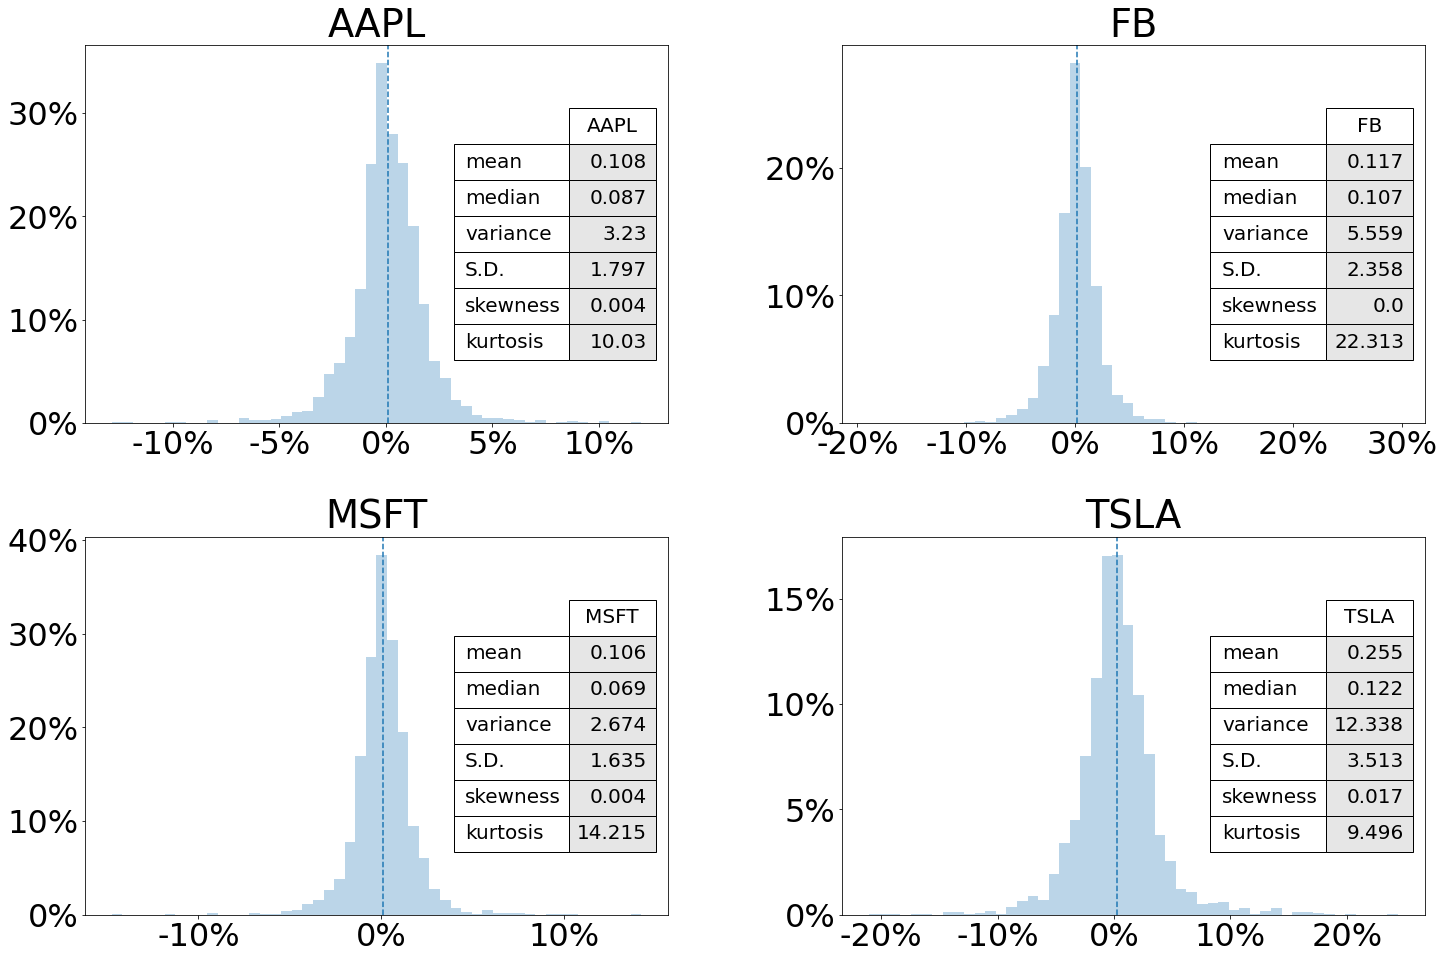

In [12]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

# plot table with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        # save summary statistics data
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        # Turn of grid lines
        a.grid(False)

   
plt.show()

this code combines all the plots to a single graph and outlinnes where each stock is on graph

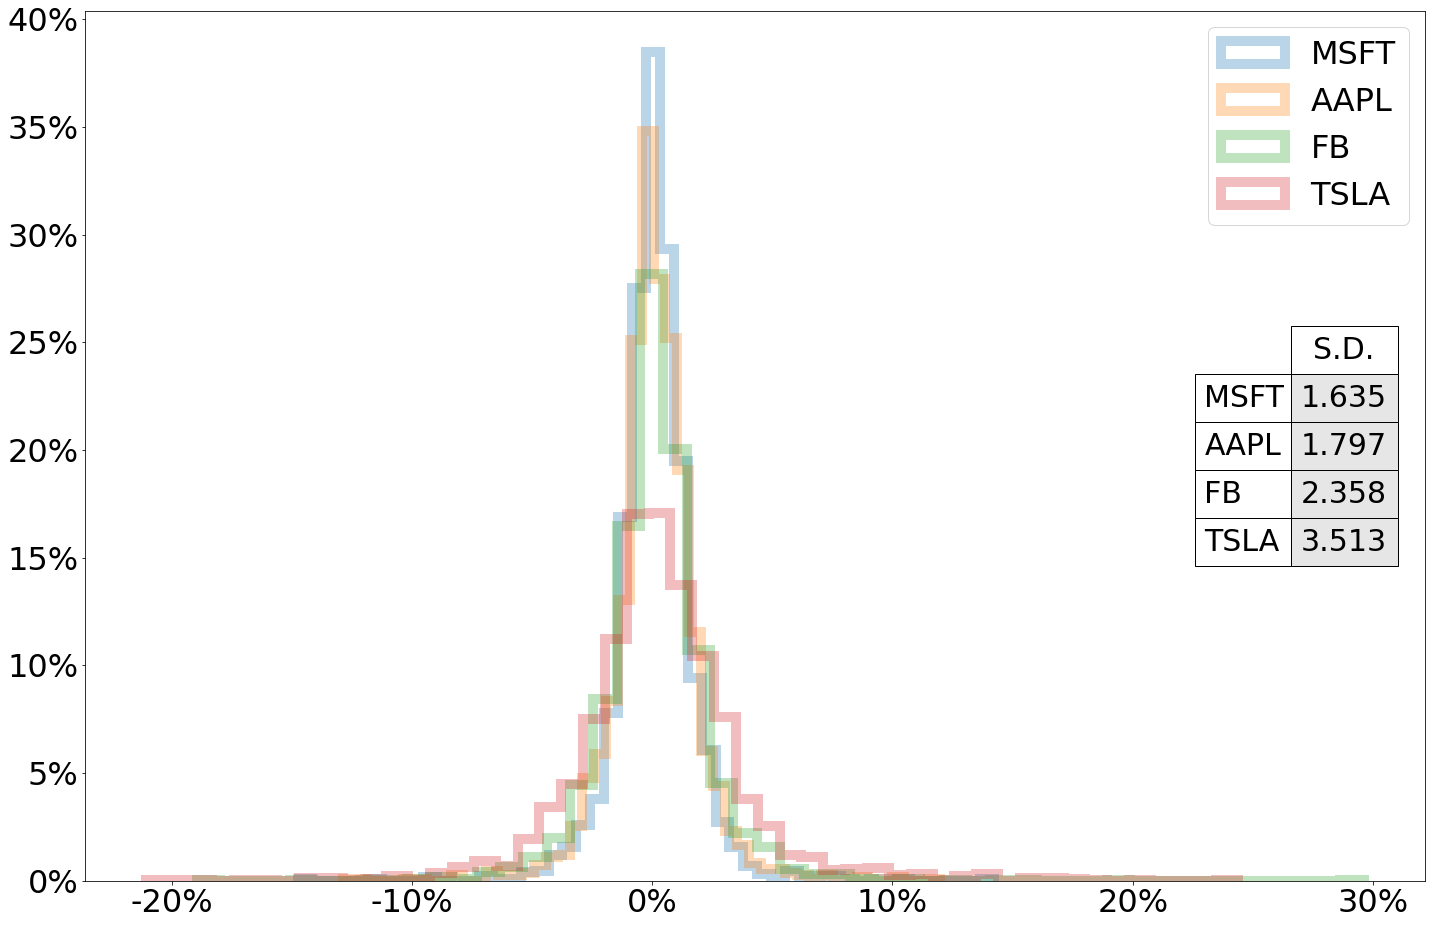

In [13]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", alpha = .3, label = key, linewidth = 10, density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

fills in each area of the graph each stock occupies and it makes it easier to compare a small number of stocks

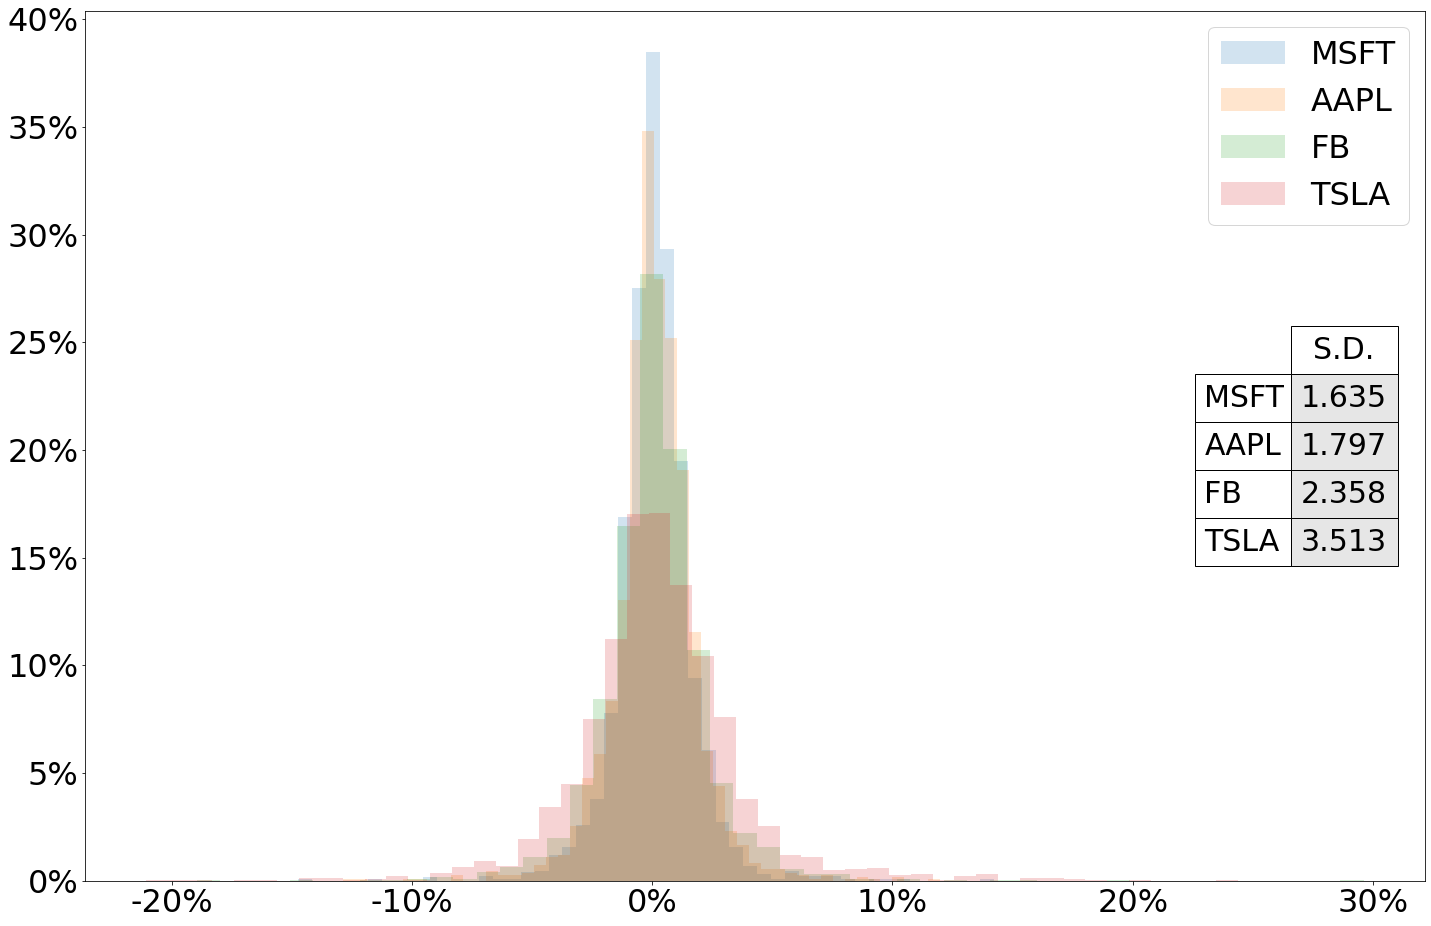

In [14]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()